<a href="https://colab.research.google.com/github/Sand08/Statistics-and-Machine-Learning/blob/main/neuralNetworksAndLossFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing and Exploring Dataset**

In [ ]:
import pandas as pd

data = pd.read_csv("/content/star_classification 1.csv")
data.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [ ]:
data.describe()
min_value = data['u'].min()
min_row = data.loc[data['u'] == min_value]
print(min_row)

min_row_index = data['u'].idxmin()

data.drop(min_row_index, inplace=True)

             obj_ID       alpha     delta       u       g        r         i  \
79543  1.237649e+18  224.006526 -0.624304 -9999.0 -9999.0  18.1656  18.01675   

            z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID class  \
79543 -9999.0     752       301        2       537  3.731277e+18  STAR   

       redshift  plate    MJD  fiber_ID  
79543  0.000089   3314  54970       162  


In [ ]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,4481.403354,301.0,3.511625,186.127011,5.783903e+18,0.576667,5137.027890,55588.653687,449.315613
std,8.438450e+12,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,1964.739021,0.0,1.586913,149.007687,3.324026e+18,0.730709,2952.312485,1808.492217,272.498252
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,3187.000000,301.0,2.000000,82.000000,2.844137e+18,0.054522,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,4188.000000,301.0,4.000000,146.000000,5.614896e+18,0.424176,4987.000000,55869.000000,433.000000
75%,1.237668e+18,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,5326.000000,301.0,5.000000,241.000000,8.332365e+18,0.704172,7400.500000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dataset = data[['u', 'g', 'r', 'i', 'z', 'redshift', 'class']]
dataset.describe()

,u,g,r,i,z,redshift
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,22.080679,20.631583,19.645777,19.084865,18.768988,0.576667
std,2.251068,2.037384,1.854763,1.757900,1.765982,0.730709
min,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,20.352410,18.965240,18.135795,17.732280,17.460830,0.054522
50%,22.179140,21.099930,20.125310,19.405150,19.004600,0.424176
75%,23.687480,22.123775,21.044790,20.396510,19.921120,0.704172
max,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


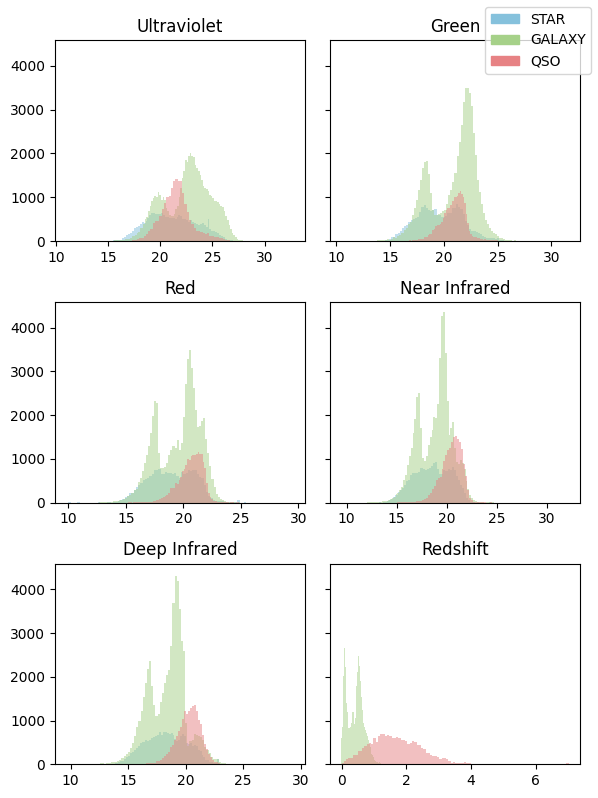

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def group_by_class(dataset):
    groups = dataset.groupby(dataset['class'])
    return {
        'STAR': groups.get_group('STAR'),
        'GALAXY': groups.get_group('GALAXY'),
        'QSO': groups.get_group('QSO'),
    }

class_color = {
    'STAR': '#85c1dc',
    'GALAXY': '#a6d189',
    'QSO': '#e78284'
}

def histogram_for(ax, feature, title, groups):
    for cls, group in groups.items():
        group = groups[cls]
        ax.hist(group[feature], bins=100, alpha=0.5, label=cls, color=class_color[cls])
    ax.set_title(title)

groups = group_by_class(dataset)
fig, axes = plt.subplots(3, 2, sharey='all')
histogram_for(axes[0, 0], 'u', 'Ultraviolet', groups)
histogram_for(axes[0, 1], 'g', 'Green', groups)
histogram_for(axes[1, 0], 'r', 'Red', groups)
histogram_for(axes[1, 1], 'i', 'Near Infrared', groups)
histogram_for(axes[2, 0], 'z', 'Deep Infrared', groups)
histogram_for(axes[2, 1], 'redshift', 'Redshift', groups)
fig.legend(handles=[ Patch(label=cls, color=col) for cls, col in class_color.items() ])
fig.set_size_inches(6, 8)
fig.tight_layout()
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split

class_mapping = {
    'STAR': 0,
    'GALAXY': 1,
    'QSO': 2
}

x = dataset[['u', 'g', 'r', 'i', 'z', 'redshift']].to_numpy()
y = dataset['class'].map(class_mapping).to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6)

# **Cost Functions**

**Transformed loss**

In [ ]:
import numpy as np
import tensorflow as tf



def my_custom_transformation_loss(y_true, y_pred):
    num_samples = tf.shape(y_true)[0]
    loss = tf.constant(0.0)
    i = tf.constant(0)

    def condition(i, loss):
        return tf.less(i, num_samples)

    def body(i, loss):
        # Get the true class index and cast to int
        true_class_index = tf.cast(tf.gather(y_true, i), tf.int32)

        # Create one-hot encoding for the true class
        one_hot = tf.one_hot(true_class_index, depth=tf.shape(y_pred)[-1])

        # Get predicted probability for the true class using matrix multiplication
        predicted_prob = tf.reduce_sum(tf.multiply(tf.gather(y_pred, i), one_hot)) # Matrix multiplication

        # Calculate loss for this sample and add it to total loss
        sample_loss = -tf.math.log(predicted_prob + 1e-7)
        loss = tf.add(loss, sample_loss)

        return [tf.add(i, 1), loss]

    _, final_loss = tf.while_loop(condition, body, [i, loss])
    average_loss = final_loss / tf.cast(num_samples, tf.float32)
    transformed_loss = tf.math.log(average_loss + 1.0)  # Apply a logarithmic transformation

    return transformed_loss

**scaled loss**

In [ ]:
import numpy as np
import tensorflow as tf



def my_custom_scaled_loss(y_true, y_pred):
    num_samples = tf.shape(y_true)[0]
    loss = tf.constant(0.0)
    i = tf.constant(0)

    def condition(i, loss):
        return tf.less(i, num_samples)

    def body(i, loss):
        # Get the true class index and cast to int
        true_class_index = tf.cast(tf.gather(y_true, i), tf.int32)

        # Create one-hot encoding for the true class
        one_hot = tf.one_hot(true_class_index, depth=tf.shape(y_pred)[-1])

        # Get predicted probability for the true class using matrix multiplication
        predicted_prob = tf.reduce_sum(tf.multiply(tf.gather(y_pred, i), one_hot)) # Matrix multiplication

        # Calculate loss for this sample and add it to total loss
        sample_loss = -tf.math.log(predicted_prob + 1e-7)
        loss = tf.add(loss, sample_loss)

        return [tf.add(i, 1), loss]

    _, final_loss = tf.while_loop(condition, body, [i, loss])
    average_loss = final_loss / tf.cast(num_samples, tf.float32)
    scaled_loss = average_loss / 1000.0  # Scale down the loss by a factor of 1000
    return scaled_loss

**constant loss**

In [ ]:
import numpy as np
import tensorflow as tf



def my_custom_constant_loss(y_true, y_pred):
    num_samples = tf.shape(y_true)[0]
    loss = tf.constant(0.0)
    i = tf.constant(0)

    def condition(i, loss):
        return tf.less(i, num_samples)

    def body(i, loss):
        # Get the true class index and cast to int
        true_class_index = tf.cast(tf.gather(y_true, i), tf.int32)

        # Create one-hot encoding for the true class
        one_hot = tf.one_hot(true_class_index, depth=tf.shape(y_pred)[-1])

        # Get predicted probability for the true class using matrix multiplication
        predicted_prob = tf.reduce_sum(tf.multiply(tf.gather(y_pred, i), one_hot)) # Matrix multiplication

        # Calculate loss for this sample and add it to total loss
        sample_loss = -tf.math.log(predicted_prob + 1e-7)
        loss = tf.add(loss, sample_loss)

        return [tf.add(i, 1), loss]

    _, final_loss = tf.while_loop(condition, body, [i, loss])
    average_loss = final_loss / tf.cast(num_samples, tf.float32)
    loss_with_constant = average_loss + 0.2  # Add a constant of 0.2 to the loss
    return loss_with_constant

# **FFNN**

In [ ]:
# Build FFNN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])


# Compile and train the model
model.compile(optimizer='adam', loss=my_custom_loss, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=4, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12000/12000 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.7574 - loss: 0.4226 - val_accuracy: 0.9432 - val_loss: 0.1478
Epoch 2/5
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9333 - loss: 0.1552 - val_accuracy: 0.9460 - val_loss: 0.1253
Epoch 3/5
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9411 - loss: 0.1365 - val_accuracy: 0.9522 - val_loss: 0.1146
Epoch 4/5
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9463 - loss: 0.1274 - val_accuracy: 0.9473 - val_loss: 0.1215
Epoch 5/5
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9495 - loss: 0.1217 - val_accuracy: 0.9467 - val_loss: 0.1213
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9460 - loss: 0.1463
Test Accuracy: 0.95


**Evaluating the FFNN model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

faccuracy = accuracy_score(y_test, y_pred)
fprecision = precision_score(y_test, y_pred, average='weighted')
frecall = recall_score(y_test, y_pred, average='weighted')
ff1 = f1_score(y_test, y_pred, average='weighted')
fconfusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {faccuracy:.4f}")
print(f"Precision: {fprecision:.4f}")
print(f"Recall: {frecall:.4f}")
print(f"F1 Score: {ff1:.4f}")
print("Confusion Matrix:")
print(fconfusion_mat)

Accuracy: 0.9470
Precision: 0.9477
Recall: 0.9470
F1 Score: 0.9458
Confusion Matrix:
[[ 8700     4     0]
 [  514 23026   200]
 [    1  1402  6153]]


# **CNN**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1, 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1, 1)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten


# Build CNN model
cnn_model = Sequential([
    Conv2D(32, (1, 1), activation='relu', input_shape=(x_train.shape[1], 1, 1)),
    MaxPooling2D((1, 1)),
    Conv2D(64, (1, 1), activation='relu'),
    MaxPooling2D((1, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile and train the model
cnn_model.compile(optimizer='adam', loss=my_custom_scaled_loss, metrics=['accuracy'])
cnn_model.fit(x_train, y_train, epochs=1, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.7902 - loss: 0.6970 - val_accuracy: 0.9473 - val_loss: 0.3448
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9507 - loss: 0.3479
Test Accuracy: 0.95


**Evaluating CNN Model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
y_pred_probs = cnn_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate evaluation metrics
caccuracy = accuracy_score(y_test, y_pred)
cprecision = precision_score(y_test, y_pred, average='weighted')
crecall = recall_score(y_test, y_pred, average='weighted')
cf1 = f1_score(y_test, y_pred, average='weighted')
cconfusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {caccuracy:.4f}")
print(f"Precision: {cprecision:.4f}")
print(f"Recall: {crecall:.4f}")
print(f"F1 Score: {cf1:.4f}")
print("Confusion Matrix:")
print(cconfusion_mat)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9628 - loss: 0.1216
Test Accuracy: 0.96
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Accuracy: 0.9619
Precision: 0.9617
Recall: 0.9619
F1 Score: 0.9615
Confusion Matrix:
[[ 8735     0     0]
 [  244 23067   334]
 [    5   939  6676]]


# **RNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np

# Reshape x_train for RNN
x_train_rnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)  # Reshape to (samples, timesteps, features)
x_test_rnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Build RNN model
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(x_train_rnn.shape[1], x_train_rnn.shape[2])),  # Increased units
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile and train the model
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.fit(x_train_rnn, y_train, epochs=5, batch_size=32, validation_split=0.2)  # Adjusted epochs and batch size

# Evaluate the model
test_loss, test_accuracy = rnn_model.evaluate(x_test_rnn, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
y_pred_probs = rnn_model.predict(x_test_rnn)
y_pred = np.argmax(y_pred_probs, axis=1)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7408 - loss: 0.6412 - val_accuracy: 0.8598 - val_loss: 0.3004
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9233 - loss: 0.2384 - val_accuracy: 0.9435 - val_loss: 0.1735
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9431 - loss: 0.1833 - val_accuracy: 0.9502 - val_loss: 0.1561
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9457 - loss: 0.1681 - val_accuracy: 0.9475 - val_loss: 0.1619
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9515 - loss: 0.1514 - val_accuracy: 0.9549 - val_loss: 0.1461
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9568 - loss: 0.1406
Test Accuracy: 0.96
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


**Evaluating the RNN model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


# Evaluate the model
test_loss, test_accuracy = rnn_model.evaluate(x_test_rnn, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")



# Calculate evaluation metrics
raccuracy = accuracy_score(y_test, y_pred)
rprecision = precision_score(y_test, y_pred, average='weighted')
rrecall = recall_score(y_test, y_pred, average='weighted')
rf1 = f1_score(y_test, y_pred, average='weighted')
rconfusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {raccuracy:.4f}")
print(f"Precision: {rprecision:.4f}")
print(f"Recall: {rrecall:.4f}")
print(f"F1 Score: {rf1:.4f}")
print("Confusion Matrix:")
print(rconfusion_mat)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9568 - loss: 0.1406
Test Accuracy: 0.96
Accuracy: 0.9619
Precision: 0.9617
Recall: 0.9619
F1 Score: 0.9615
Confusion Matrix:
[[ 8735     0     0]
 [  244 23067   334]
 [    5   939  6676]]


# **LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape x_train for LSTM (same as for RNN)
x_train_lstm = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_lstm = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Build LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2])),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile and train the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(x_train_lstm, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = lstm_model.evaluate(x_test_lstm, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

y_pred_probs = lstm_model.predict(x_test_lstm)
y_pred = np.argmax(y_pred_probs, axis=1)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7700 - loss: 0.5390 - val_accuracy: 0.9172 - val_loss: 0.2459
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9290 - loss: 0.2195 - val_accuracy: 0.9390 - val_loss: 0.2074
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9429 - loss: 0.1805 - val_accuracy: 0.9567 - val_loss: 0.1593
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9468 - loss: 0.1695 - val_accuracy: 0.9638 - val_loss: 0.1394
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9575 - loss: 0.1434 - val_accuracy: 0.9633 - val_loss: 0.1569
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9682 - loss: 0.1465
Test Accuracy: 0.97
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


**Evaluating the LSTM model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


# Evaluate the model
test_loss, test_accuracy = lstm_model.evaluate(x_test_lstm, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
y_pred_probs = lstm_model.predict(x_test_lstm)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate evaluation metrics
laccuracy = accuracy_score(y_test, y_pred)
lprecision = precision_score(y_test, y_pred, average='weighted')
lrecall = recall_score(y_test, y_pred, average='weighted')
lf1 = f1_score(y_test, y_pred, average='weighted')
lconfusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {laccuracy:.4f}")
print(f"Precision: {lprecision:.4f}")
print(f"Recall: {lrecall:.4f}")
print(f"F1 Score: {lf1:.4f}")
print("Confusion Matrix:")
print(lconfusion_mat)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4384 - loss: 5.9251
Test Accuracy: 0.44
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Accuracy: 0.4387
Precision: 0.4344
Recall: 0.4387
F1 Score: 0.4365
Confusion Matrix:
[[ 1906  5200  1629]
 [ 5215 14263  4167]
 [ 1623  4617  1380]]


# **Comparing the models**

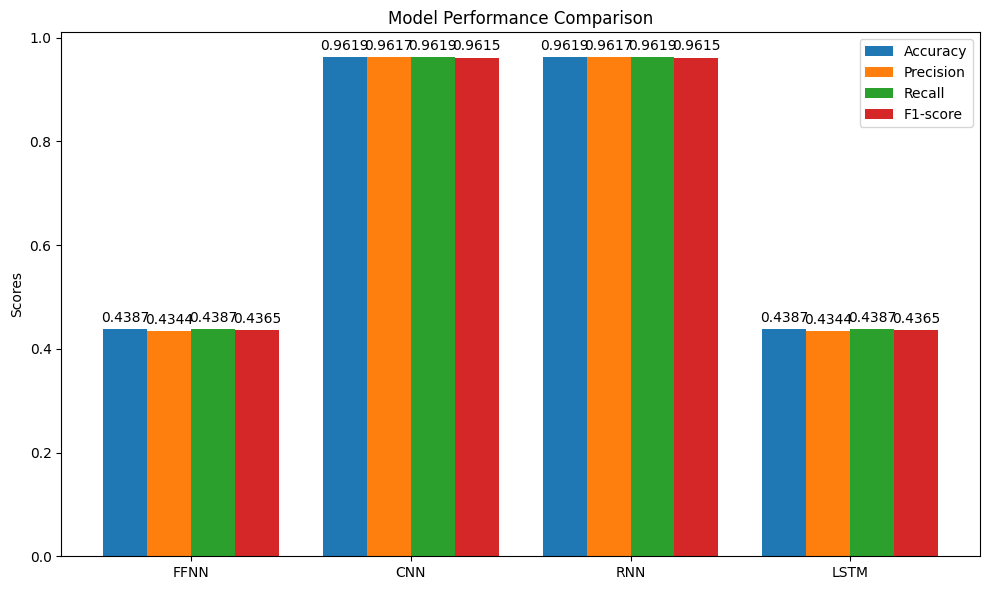

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
models = ['FFNN', 'CNN', 'RNN', 'LSTM']
accuracy = [faccuracy, caccuracy, raccuracy, laccuracy]
precision = [fprecision, cprecision, rprecision, lprecision]
recall = [frecall, crecall, rrecall, lrecall]
f1_score = [ff1, cf1, rf1, lf1]

# Create a bar plot
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width*0.5, precision, width, label='Precision')
rects3 = ax.bar(x + width*0.5, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1-score')


ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()